In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load recent global earthquake data (magnitude 2.5+ past 7 days)
url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.csv'
df = pd.read_csv(url)

df.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-23T22:44:31.447Z,4.585800,-77.729900,24.792,4.80,mb,89.0,89.0,3.40700,1.35,...,2025-04-23T23:05:25.040Z,"54 km NW of Santa Genoveva de Docordó, Colombia",earthquake,7.14,5.108,0.046000,146.0,reviewed,us,us
1,2025-04-23T22:43:41.940Z,38.433666,-122.670998,10.000,2.86,md,73.0,40.0,0.04483,0.14,...,2025-04-23T23:37:19.526Z,"3 km SE of Santa Rosa, CA",earthquake,0.19,0.490,0.140000,94.0,automatic,nc,nc
2,2025-04-23T22:19:26.060Z,18.851500,-64.958833,30.230,2.95,md,6.0,272.0,0.49640,0.20,...,2025-04-23T22:38:18.170Z,"56 km N of Charlotte Amalie, U.S. Virgin Islands",earthquake,4.86,13.330,0.049497,3.0,reviewed,pr,pr
3,2025-04-23T22:16:32.280Z,35.350333,-117.806333,7.570,2.56,ml,50.0,36.0,0.08880,0.18,...,2025-04-23T22:27:30.360Z,"16 km W of Johannesburg, CA",earthquake,0.15,0.620,0.096000,25.0,automatic,ci,ci
4,2025-04-23T21:57:52.032Z,-19.663800,-175.381700,148.088,4.90,mb,52.0,69.0,19.11600,0.68,...,2025-04-23T22:16:41.040Z,"108 km W of Pangai, Tonga",earthquake,13.07,7.113,0.031000,335.0,reviewed,us,us


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   time             265 non-null    object  
 1   latitude         265 non-null    float64 
 2   longitude        265 non-null    float64 
 3   depth            265 non-null    float64 
 4   mag              265 non-null    float64 
 5   magType          265 non-null    object  
 6   nst              240 non-null    float64 
 7   gap              240 non-null    float64 
 8   dmin             240 non-null    float64 
 9   rms              265 non-null    float64 
 10  net              265 non-null    object  
 11  id               265 non-null    object  
 12  updated          265 non-null    object  
 13  place            265 non-null    object  
 14  type             265 non-null    object  
 15  horizontalError  237 non-null    float64 
 16  depthError       265 non-null    float64 
 1

In [8]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,265.000000,265.000000,265.000000,265.000000,240.000000,240.000000,240.000000,265.000000,237.000000,265.000000,240.000000,240.000000
mean,21.443322,-28.846662,56.189014,3.910604,49.087500,122.200708,1.948730,0.648359,6.162114,4.269296,0.102674,58.387500
std,28.885578,122.364435,86.088745,0.942423,43.978274,74.788004,2.749698,0.330445,4.061466,4.313319,0.054180,102.190669
min,-56.127400,-179.290900,-2.200000,2.450000,5.000000,10.000000,0.000000,0.060000,0.110000,0.000000,0.020000,2.000000
25%,-3.473200,-142.565000,10.000000,2.950000,24.000000,63.500000,0.357000,0.380000,3.100000,1.680000,0.062000,14.000000
50%,22.101900,-68.467167,16.330000,4.200000,38.000000,105.000000,1.115500,0.650000,6.300000,1.958000,0.092768,26.000000
75%,43.472800,116.937200,66.400000,4.600000,59.500000,172.250000,2.251000,0.880000,8.840000,6.800000,0.126702,58.000000
max,86.322700,179.631300,618.499000,6.200000,372.000000,340.000000,19.116000,1.410000,26.890000,25.025000,0.346000,802.000000


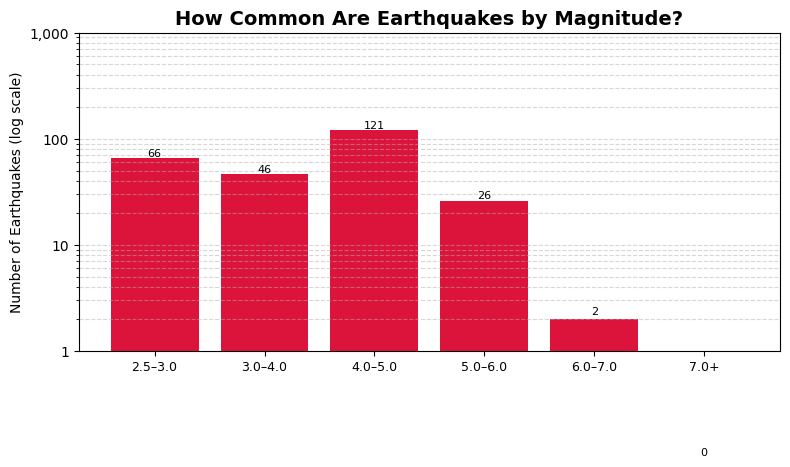

In [6]:
# Filter and bin magnitudes
df = df[df['mag'].notnull()]
bins = [2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0]
labels = ['2.5–3.0', '3.0–4.0', '4.0–5.0', '5.0–6.0', '6.0–7.0', '7.0+']
df['mag_bin'] = pd.cut(df['mag'], bins=bins, labels=labels, right=False)
counts = df['mag_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(counts.index, counts.values, color='crimson')
plt.yscale('log')
plt.ylabel('Number of Earthquakes (log scale)', fontsize=10)
plt.title('How Common Are Earthquakes by Magnitude?', fontsize=14, weight='bold')
plt.xticks(fontsize=9)
plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1,000'])
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)

# Annotate bar tops
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{int(yval)}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()